Zadovoljstvo avio putovnika 

In [1]:
# Ucitavanje biblioteka 
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


%matplotlib inline


In [2]:
#ucitavanje vec podjeljenig train i test podataka
test = pd.read_csv('test.csv',sep=',') 
train = pd.read_csv('train.csv',sep=',')

print(f"Broj jedinki u train.csv: {len(train)} (80%)")
print(f"Broj jedinki u test.csv: {len(test)} (20%)")
print(f"ukupno postoji : {len(test)+len(train)} jedinstvenih jedinki")


Broj jedinki u train.csv: 103904 (80%)
Broj jedinki u test.csv: 25976 (20%)
ukupno postoji : 129880 jedinstvenih jedinki


In [3]:


#mjenjanja ne numerickih varijable u numericke
test['Gender']= test['Gender'].replace({'Male':0, 'Female':1})
test['Customer Type']= test['Customer Type'].replace({'Loyal Customer':0, 'disloyal Customer':1})
test['Type of Travel']= test['Type of Travel'].replace({'Personal Travel':0, 'Business travel':1})
test['Class']= test['Class'].replace({'Eco':0, 'Business':1, 'Eco Plus':2})
test['satisfaction']= test['satisfaction'].replace({'satisfied':0, 'neutral or dissatisfied':1})

train['Gender']= train['Gender'].replace({'Male':0, 'Female':1})
train['Customer Type']= train['Customer Type'].replace({'Loyal Customer':0, 'disloyal Customer':1})
train['Type of Travel']= train['Type of Travel'].replace({'Personal Travel':0, 'Business travel':1})
train['Class']= train['Class'].replace({'Eco':0, 'Business':1, 'Eco Plus':2})
train['satisfaction']= train['satisfaction'].replace({'satisfied':0, 'neutral or dissatisfied':1})



C:\Users\vboxuser\AppData\Local\Temp\ipykernel_10684\2382790850.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Gender']= test['Gender'].replace({'Male':0, 'Female':1})
C:\Users\vboxuser\AppData\Local\Temp\ipykernel_10684\2382790850.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Customer Type']= test['Customer Type'].replace({'Loyal Customer':0, 'disloyal Customer':1})
C:\Users\vboxuser\AppData\Local\Temp\ipykernel_10684\2382790850.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,0,13,0,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,1
1,1,5047,0,1,25,1,1,235,3,2,...,1,1,5,3,1,4,1,1,6.0,1
2,2,110028,1,0,26,1,1,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,0
3,3,24026,1,0,25,1,1,562,2,5,...,2,2,5,3,1,4,2,11,9.0,1
4,4,119299,0,0,61,1,1,214,3,3,...,3,3,4,4,3,3,3,0,0.0,0


In [5]:
# izbacivanje nepotrebnog prvog indexnog stupca te identifikatora osobe id 
train= train.drop(columns=['Unnamed: 0','id'])
test= test.drop(columns=['Unnamed: 0','id'])

In [6]:
test.head()
summary = pd.DataFrame({
    "Min": train.min(numeric_only=True), #provjera postoji li podataka sa vrijednosti 0 
    "Max": train.max(numeric_only=True)
})

print(summary)

                                    Min     Max
Gender                              0.0     1.0
Customer Type                       0.0     1.0
Age                                 7.0    85.0
Type of Travel                      0.0     1.0
Class                               0.0     2.0
Flight Distance                    31.0  4983.0
Inflight wifi service               0.0     5.0
Departure/Arrival time convenient   0.0     5.0
Ease of Online booking              0.0     5.0
Gate location                       0.0     5.0
Food and drink                      0.0     5.0
Online boarding                     0.0     5.0
Seat comfort                        0.0     5.0
Inflight entertainment              0.0     5.0
On-board service                    0.0     5.0
Leg room service                    0.0     5.0
Baggage handling                    1.0     5.0
Checkin service                     0.0     5.0
Inflight service                    0.0     5.0
Cleanliness                         0.0 

In [7]:
varijable = ["Age","Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"]
 #0 u podacima se zamjenjuje sa vrijednosti nan u svrhu lakse uklanjanja ne postojecih podataka
train[varijable] = train[varijable].replace(0, np.nan)
train[varijable] = train[varijable].fillna(train[varijable].median())
test[varijable] = test[varijable].replace(0, np.nan)
test[varijable] = test[varijable].fillna(test[varijable].median())

In [8]:
print("NaN vrijednosti u train setu:", train.isna().sum().sum())
print("NaN vrijednosti u test setu:", test.isna().sum().sum())

NaN vrijednosti u train setu: 310
NaN vrijednosti u test setu: 83


In [9]:
test= test.dropna(how="any")#izbaciti sve redove gdje su sve varijable nan
train=train.dropna(how="any")


In [10]:
print("NaN vrijednosti u train setu:", train.isna().sum().sum())
print("NaN vrijednosti u test setu:", test.isna().sum().sum())

NaN vrijednosti u train setu: 0
NaN vrijednosti u test setu: 0


In [11]:
varijable = ["Age","Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]

full_data= pd.concat([train,test] ,ignore_index=True )  
full_data=full_data[varijable]
statistika = full_data.describe().T # Transponiramo da varijable budu u redovima
statistika = statistika[['mean', '50%', 'std']]  # Odabiremo samo prosjek, medijan i standardnu devijaciju
statistika.columns = ['Prosjek', 'Medijan', 'Standardna devijacija']  # Preimenujemo stupce

# Ispis rezultata
statistika= statistika.round(3)
print(statistika)



                                    Prosjek  Medijan  Standardna devijacija
Age                                  39.429     40.0                 15.118
Flight Distance                    1190.211    844.0                997.561
Inflight wifi service                 2.819      3.0                  1.239
Departure/Arrival time convenient     3.212      3.0                  1.351
Ease of Online booking                2.888      3.0                  1.272
Gate location                         2.977      3.0                  1.278
Food and drink                        3.208      3.0                  1.326
Online boarding                       3.348      4.0                  1.256
Seat comfort                          3.442      4.0                  1.319
Inflight entertainment                3.359      4.0                  1.334
On-board service                      3.383      4.0                  1.287
Leg room service                      3.369      4.0                  1.297
Baggage hand

In [12]:

X_train= train.iloc[:,:-1]#sve osim zadnjeg stupca se uzima u varijablu x
X_test= test.iloc[:,:-1]
y_train= train.iloc[:,-1]#samo zadnji stupac se uzima u varijablu y
y_test= test.iloc[:,-1]

# svi podaci podjeljeni u svrhu kasnije kross validacije
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

In [13]:
print(f"Broj jedinki u train.csv: {len(X_train)} (80%)")
print(f"Broj jedinki u test.csv: {len(X_test)} (20%)")
print(f"ukupno postoji : {len(X_test)+len(X_train)} jedinstvenih jedinki")

Broj jedinki u train.csv: 103594 (80%)
Broj jedinki u test.csv: 25893 (20%)
ukupno postoji : 129487 jedinstvenih jedinki


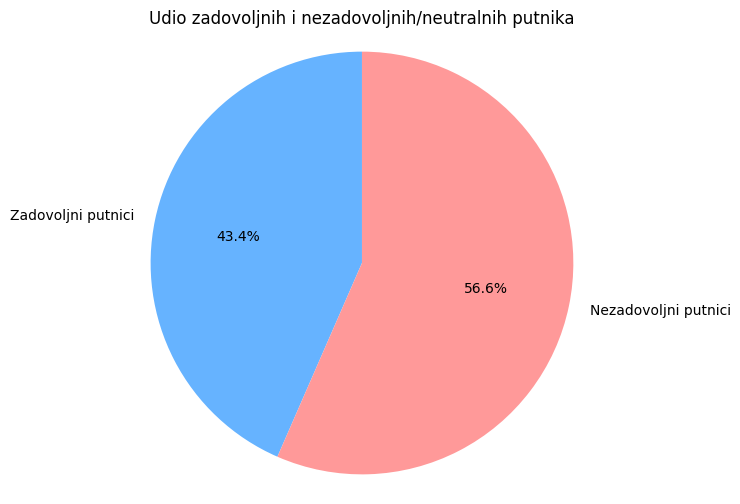

In [14]:

counts = y.value_counts().sort_index()  # 0 i 1 redom

labels = ['Zadovoljni putnici', 'Nezadovoljni putnici']
colors = ['#66b3ff', '#ff9999'] 

#pie chart zadovoljstva
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%.1f%%', startangle=90, colors=colors)
plt.title('Udio zadovoljnih i nezadovoljnih/neutralnih putnika')
plt.axis('equal')
plt.show()


In [15]:


clf = tree.DecisionTreeClassifier(max_depth=12, random_state=0)
clf = clf.fit(X_train, y_train)

clf_for_cv = tree.DecisionTreeClassifier(max_depth=12, random_state=0)
scores_clf_cv = cross_val_score(clf_for_cv, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print(clf.predict(X_test))

train_tree_acu= clf.score(X_train,y_train)
test_tree_acu=clf.score(X_test,y_test)

print(f'Koeficijent determinacije na skupu za testiranje: {test_tree_acu:.3f}')

print(f'tocnost na  podacima za treniranje: {train_tree_acu:.3f}')
print(f'razlika izmedu predikcija podataka za treniranje i testiranje je {(train_tree_acu-test_tree_acu)*100:.3f}%')
print(f"Kros-validacijska točnost (5-fold): {scores_clf_cv.mean():.4f} +/- {scores_clf_cv.std():.4f}")






[0 0 1 ... 1 0 1]
Koeficijent determinacije na skupu za testiranje: 0.944
tocnost na  podacima za treniranje: 0.957
razlika izmedu predikcija podataka za treniranje i testiranje je 1.245%
Kros-validacijska točnost (5-fold): 0.9434 +/- 0.0014


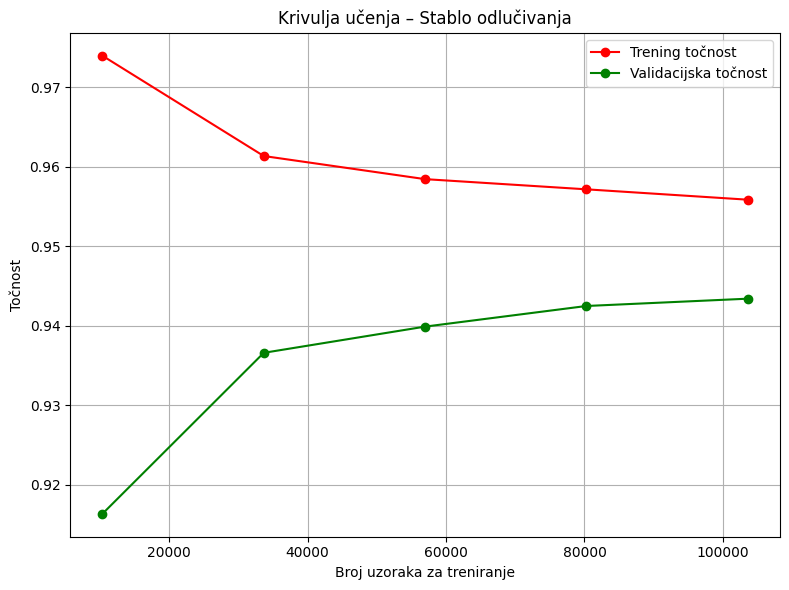

In [16]:
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(
    clf, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=0
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_tree, train_scores_tree.mean(axis=1), 'o-', color="r", label="Trening točnost")
plt.plot(train_sizes_tree, test_scores_tree.mean(axis=1), 'o-', color="g", label="Validacijska točnost")
plt.title("Krivulja učenja – Stablo odlučivanja")
plt.xlabel("Broj uzoraka za treniranje")
plt.ylabel("Točnost")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()



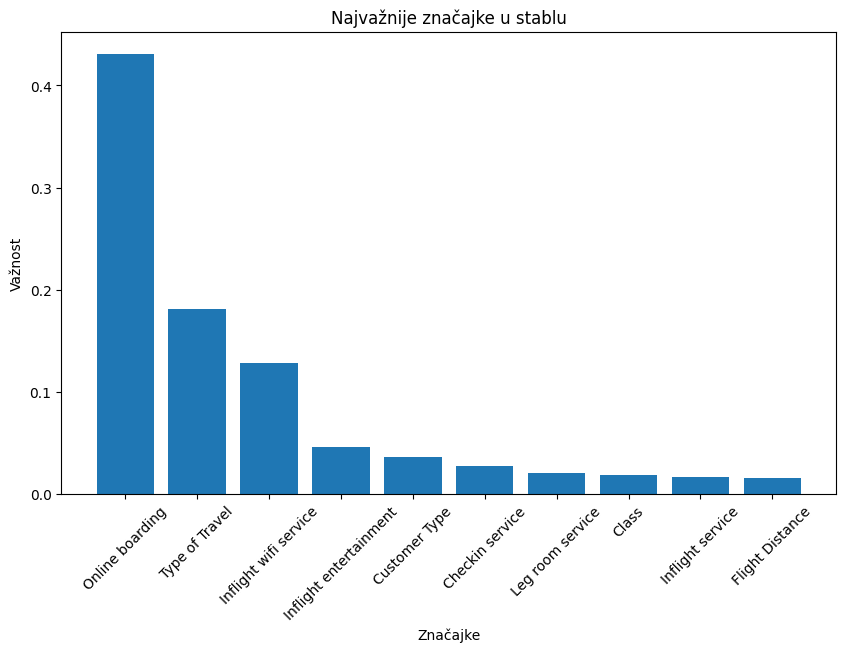

In [17]:


# Dohvati važne značajke
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sortiraj po važnosti

# Prikaz top 10 značajki
plt.figure(figsize=(10, 6))
plt.title("Najvažnije značajke u stablu")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45)
plt.xlabel("Značajke")
plt.ylabel("Važnost")
plt.show()

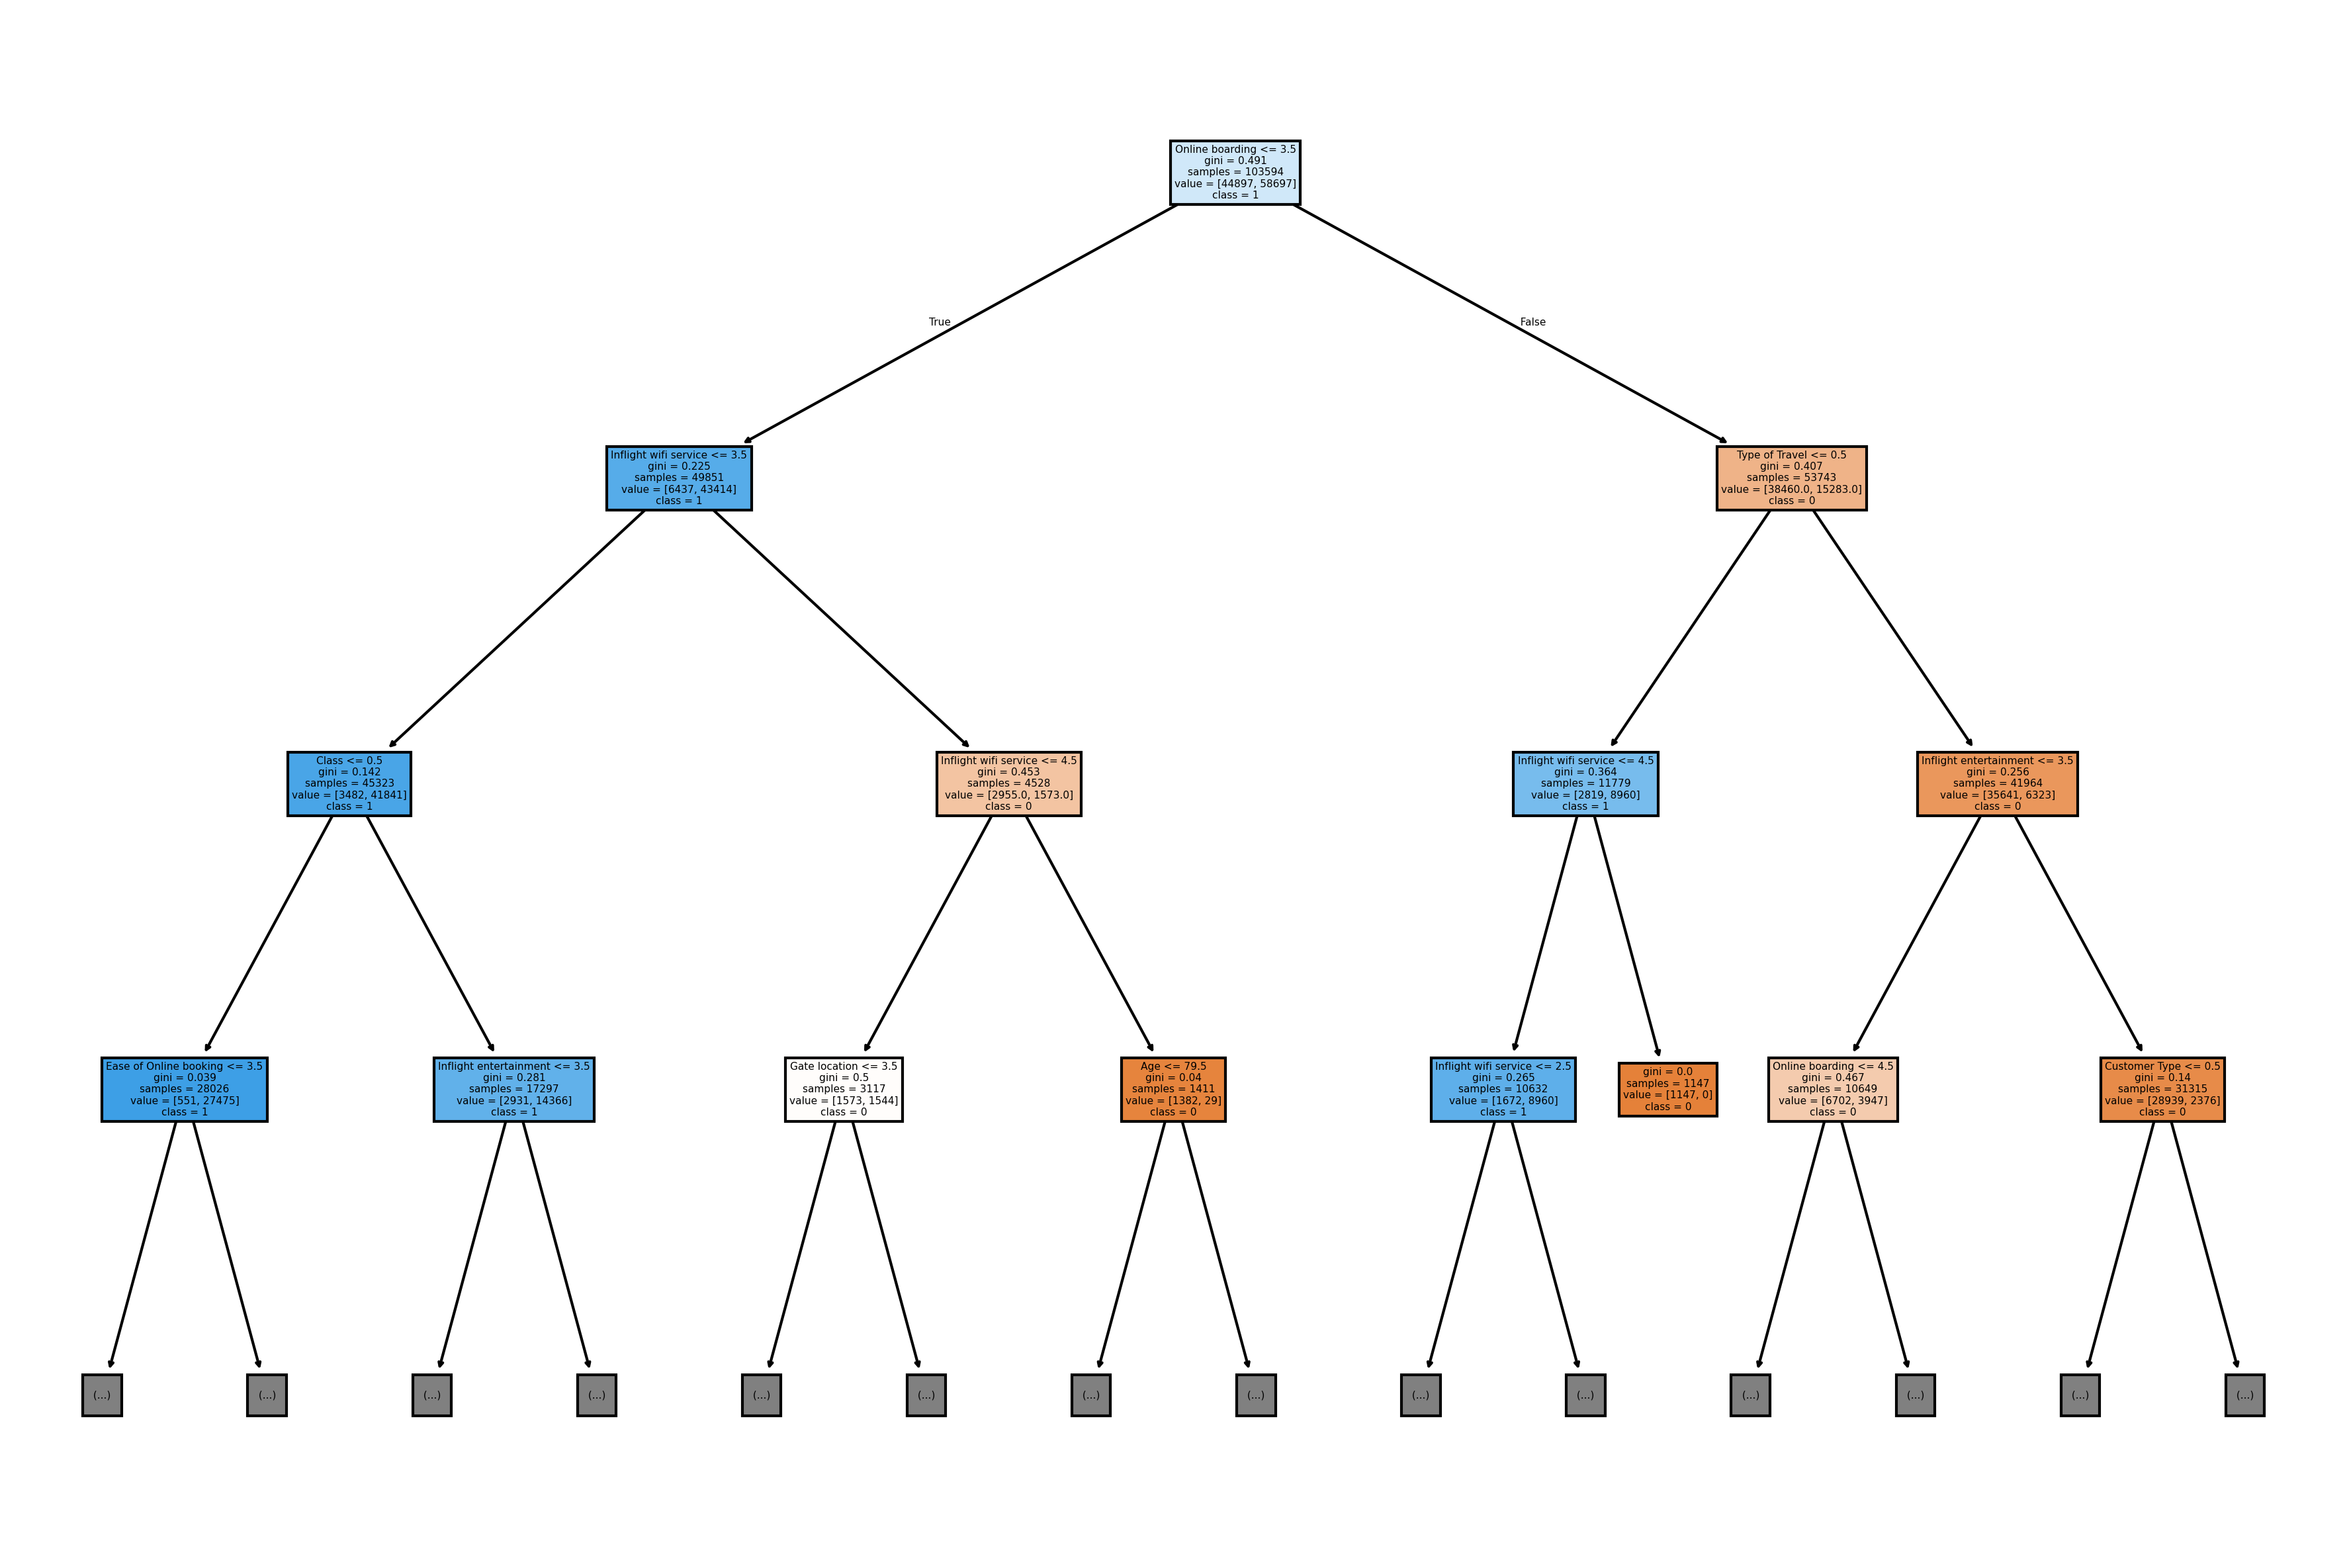

In [18]:
plt.figure(figsize=(15, 10), dpi=300)  # Povećan DPI za bolju čitljivost
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"], max_depth=3)
plt.show()

0.942 
0.947

In [19]:

nn_class= MLPClassifier(solver='adam', hidden_layer_sizes=(130,65,30), alpha=0.001,random_state=0)
nn_class.fit(X_train,y_train)




print(nn_class.predict(X_test))

nn_class_train_acu= nn_class.score(X_train,y_train)
nn_class_test_acu= nn_class.score(X_test,y_test)

print(f'Koeficijent determinacije na skupu za testiranje: {nn_class_test_acu:.3f}')

print(f'tocnost na  podacima za treniranje: {nn_class_train_acu:.3f}')
print(f'razlika izmedu predikcija podataka za treniranje i testiranje je {(nn_class_train_acu-nn_class_test_acu)*100:.3f}%')

print('Kros-validacijska točnost (5-fold): 0.9382 +/- 0.0051')

# kros-validacija ukloniti komentare samo ako se zele provjerit rezultati 20-30 minuta vremena izvodenja

#nn_class_cv = MLPClassifier(solver='adam', hidden_layer_sizes=(130,65,30), alpha=0.001, random_state=0, max_iter=300) # Povećan max_iter, uklonjen early_stopping
#nn_cv_score= cross_val_score(nn_class_cv, X,y, cv=5, scoring='accuracy',n_jobs=-1)
#print(f"Kros-validacijska točnost (5-fold): {nn_cv_score.mean():.4f} +/- {nn_cv_score.std():.4f}")

[0 0 1 ... 1 0 1]
Koeficijent determinacije na skupu za testiranje: 0.935
tocnost na  podacima za treniranje: 0.940
razlika izmedu predikcija podataka za treniranje i testiranje je 0.541%
Kros-validacijska točnost (5-fold): 0.9382 +/- 0.0051


In [20]:
# Ponovno inicijaliziraj model za learning_curve 
#model_nn = MLPClassifier(solver='adam', hidden_layer_sizes=(130, 65, 30), alpha=0.001,
 #                        random_state=0, max_iter=300)

#train_sizes_nn, train_scores_nn, test_scores_nn = learning_curve(
 #   model_nn, X, y, cv=5, scoring='accuracy', n_jobs=-1,
  #  train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=0
#)

# Izračunaj srednje vrijednosti
#train_mean = train_scores_nn.mean(axis=1)
#test_mean = test_scores_nn.mean(axis=1)

# Crtanje grafa
#plt.figure(figsize=(8, 6))
#plt.plot(train_sizes_nn, train_mean, 'o-', color='r', label='Točnost na podacima za treniranje')
#plt.plot(train_sizes_nn, test_mean, 'o-', color='g', label='Validacijska točnost')
#plt.title('Krivulja učenja – Neuronska mreža')
#plt.xlabel('Broj uzoraka za treniranje')
#plt.ylabel('Točnost')
#plt.grid(True)
#plt.legend(loc='best')
#plt.tight_layout()

# Spremanje grafa
#plt.savefig("krivulja_ucenja_ispravljeno_nn.png", dpi=300)  # Možeš promijeniti ime i lokaciju
#plt.close()  # Važno ako koristiš više grafova u petlji

In [21]:

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=12, oob_score=True)
rf = rf.fit(X_train,y_train)
y_pred=(rf.predict(X_test))

rf_train_acu= rf.score(X_train,y_train)
rf_test_acu= rf.score(X_test,y_test)
scores_rf_cv = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=0, max_depth=12), X, y, cv=5, scoring='accuracy')


print(f'Koeficijent determinacije na skupu za testiranje: {rf_test_acu:.3f}')

print(f'tocnost na  podacima za treniranje: {rf_train_acu:.3f}')
print(f'razlika izmedu predikcija podataka za treniranje i testiranje je {(rf_train_acu-rf_test_acu)*100:.3f}%')
print(f'oob procjena{rf.oob_score_:.3f}:')
print(f"Kros-validacijska točnost (5-fold) s max_depth=12: {scores_rf_cv.mean():.4f} +/- {scores_rf_cv.std():.4f}")





Koeficijent determinacije na skupu za testiranje: 0.945
tocnost na  podacima za treniranje: 0.955
razlika izmedu predikcija podataka za treniranje i testiranje je 0.911%
oob procjena0.944:
Kros-validacijska točnost (5-fold) s max_depth=12: 0.9446 +/- 0.0013


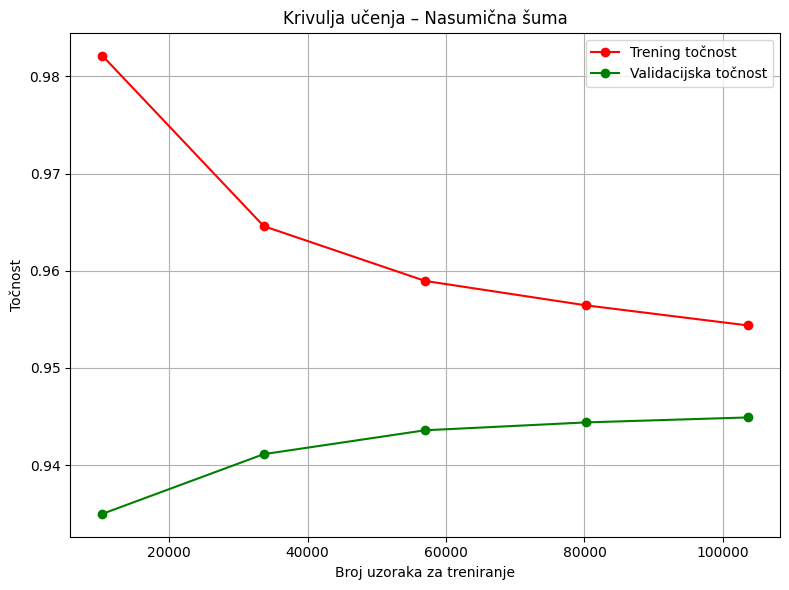

In [22]:
# Nasumična šuma
model_rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0)

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    model_rf, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=0
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_rf, train_scores_rf.mean(axis=1), 'o-', color="r", label="Trening točnost")
plt.plot(train_sizes_rf, test_scores_rf.mean(axis=1), 'o-', color="g", label="Validacijska točnost")
plt.title("Krivulja učenja – Nasumična šuma")
plt.xlabel("Broj uzoraka za treniranje")
plt.ylabel("Točnost")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

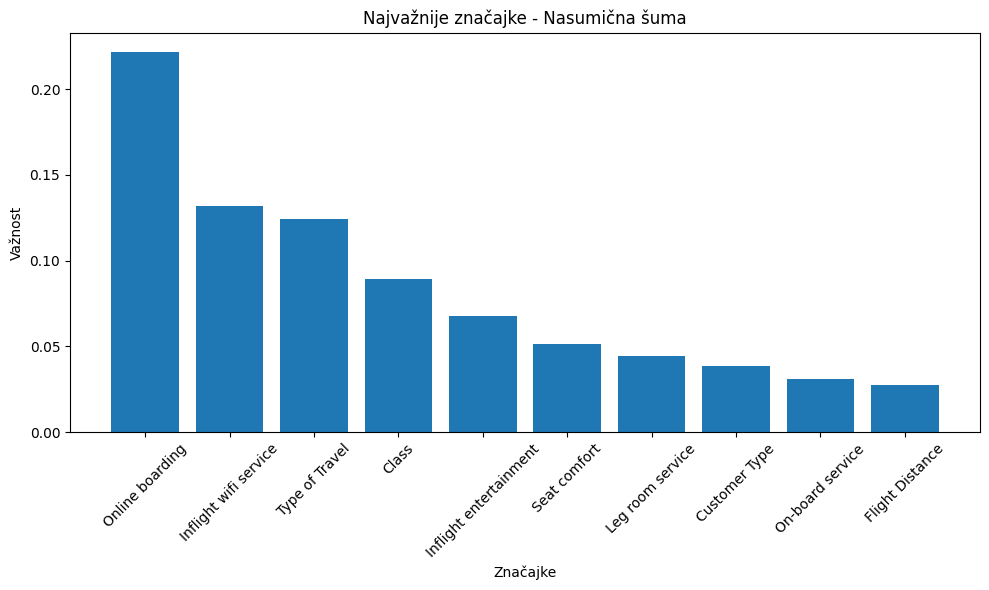

In [25]:
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Najvažnije značajke - Nasumična šuma")
plt.bar(range(10), importances_rf[indices_rf[:10]], align="center")
plt.xticks(range(10), X_train.columns[indices_rf[:10]], rotation=45)
plt.xlabel("Značajke")
plt.ylabel("Važnost")
plt.tight_layout()
plt.show()

15 = 0.94, 2.209
18= 0.957, 3.285
12=0.945,  0.911
10=0.936, 0.351
11=0.941, 0.529


In [26]:


print('neuronska mreža klasifikacija')
matrica_konfuzije = pd.crosstab(nn_class.predict(X_test), y_test.values)
print(matrica_konfuzije)
print(f'Koeficijent determinacije na skupu za testiranje: {nn_class_test_acu:.3f}')
print(f"Kros-validacijska točnost (5-fold): 0.9382 +/- 0.0051 ")
#print(f"Kros-validacijska točnost (5-fold): {nn_cv_score.mean():.4f} +/- {nn_cv_score.std():.4f}")  # samo u slucaju ako je krosvalidacija testirana ukloniti komentar
print('Stopa odaziva za neuronsku mrežu: {:.2f}'.format(recall_score(y_test, nn_class.predict(X_test))))
print('Preciznost za neuronsku mrežu: {:.2f}'.format(precision_score(y_test, nn_class.predict(X_test))))
print('F1-score za neuronsku mrežu: {:.2f}'.format(f1_score(y_test, nn_class.predict(X_test), pos_label=1)))

print('------------------------------------------------------------------------------------------------------------')
print('\n')
print('stablo odlucivanja')
matrica_konfuzije2 = pd.crosstab(clf.predict(X_test), y_test.values)
print(matrica_konfuzije2)
print(f'Koeficijent determinacije na skupu za testiranje: {test_tree_acu:.3f}')
print(f"Kros-validacijska točnost (5-fold): {scores_clf_cv.mean():.4f} +/- {scores_clf_cv.std():.4f}")
print('Stopa odaziva za stablo odlučivanja: {:.2f}'.format(recall_score(y_test, clf.predict(X_test))))
print('Preciznost za stablo odlučivanja: {:.2f}'.format(precision_score(y_test, clf.predict(X_test))))
print('F1-score za stablo odlučivanja: {:.2f}'.format(f1_score(y_test, clf.predict(X_test), pos_label=1)))
print('------------------------------------------------------------------------------------------------------------')

print('\n')
print('Nasumicna suma')
matrica_konfuzije3 = pd.crosstab(rf.predict(X_test), y_test.values)
print(matrica_konfuzije3)
print(f'Koeficijent determinacije na skupu za testiranje: {rf_test_acu:.3f}')
print(f"Kros-validacijska točnost (5-fold): {scores_rf_cv.mean():.4f} +/- {scores_rf_cv.std():.4f}")
print('Stopa odaziva za nasumicnu sumu: {:.2f}'.format(recall_score(y_test, rf.predict(X_test))))
print('Preciznost za nasumicnu sumu: {:.2f}'.format(precision_score(y_test, rf.predict(X_test))))
print('F1-score za nasumičnu šumu: {:.2f}'.format(f1_score(y_test, rf.predict(X_test), pos_label=1)))



neuronska mreža klasifikacija
col_0      0      1
row_0              
0      10296    615
1       1069  13913
Koeficijent determinacije na skupu za testiranje: 0.935
Kros-validacijska točnost (5-fold): 0.9382 +/- 0.0051 
Stopa odaziva za neuronsku mrežu: 0.96
Preciznost za neuronsku mrežu: 0.93
F1-score za neuronsku mrežu: 0.94
------------------------------------------------------------------------------------------------------------


stablo odlucivanja
col_0      0      1
row_0              
0      10498    579
1        867  13949
Koeficijent determinacije na skupu za testiranje: 0.944
Kros-validacijska točnost (5-fold): 0.9434 +/- 0.0014
Stopa odaziva za stablo odlučivanja: 0.96
Preciznost za stablo odlučivanja: 0.94
F1-score za stablo odlučivanja: 0.95
------------------------------------------------------------------------------------------------------------


Nasumicna suma
col_0      0      1
row_0              
0      10482    530
1        883  13998
Koeficijent determinacije 

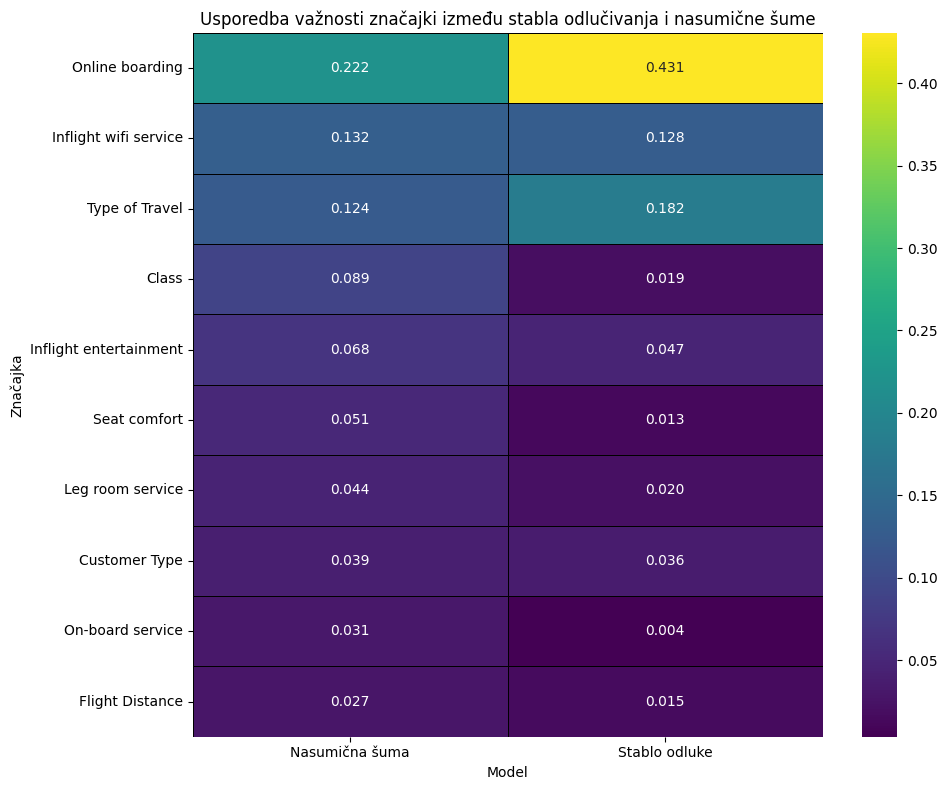

In [27]:

importances_dt = clf.feature_importances_
dt_importances_series = pd.Series(importances_dt, index=X_train.columns)

importances_rf = rf.feature_importances_
rf_importances_series = pd.Series(importances_rf, index=X_train.columns)

top_n = 10 

top_rf_features = rf_importances_series.nlargest(top_n).index

comparison_importances = pd.DataFrame({
    'Nasumična šuma': rf_importances_series.reindex(top_rf_features),
    'Stablo odluke': dt_importances_series.reindex(top_rf_features)
})

comparison_importances.fillna(0, inplace=True)

comparison_importances.sort_values(by='Nasumična šuma', ascending=False, inplace=True)

# Crtanje Heatmapa
plt.figure(figsize=(10, 8))
sns.heatmap(comparison_importances, annot=True, cmap='viridis', fmt=".3f", linewidths=.5, linecolor='black')
plt.title(f'Usporedba važnosti značajki između stabla odlučivanja i nasumične šume')
plt.xlabel('Model')
plt.ylabel('Značajka')
plt.tight_layout() 

plt.show()
